<a href="https://colab.research.google.com/github/Mahima2208/Airline_Passenger_Referal_Prediction_Classification/blob/main/AIRLINE_PASSENGER_REFERAL_PREDICTION_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas.util.testing as tm
%matplotlib inline
import seaborn as sns
import math
import scipy.stats as stat
from datetime import *
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings(action='ignore')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  """


In [2]:
# Mounting drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Reading dataset.
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Cohort Tosh/Capstone Project/Classification/data_airline_reviews.xlsx')

In [4]:
# first look of the dataset.
df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# first look of the dataset.
df.tail()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
131890,Ukraine International,NaN,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131892,Ukraine International,NaN,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131894,Ukraine International,NaN,Kasper Hettinga,10th February 2006,KBP-AMS with UIA. Although it was a relatively...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no


In [6]:
# Shape of the dataset.
df.shape

(131895, 17)

In [7]:
# Columns available
df.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

In [9]:
df.describe()

,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
count,64017.000000,60681.000000,60715.000000,52608.000000,44193.000000,39358.000000,63975.000000
mean,5.145430,2.952160,3.191814,2.908170,2.863372,2.692820,2.943962
std,3.477532,1.441362,1.565789,1.481893,1.507262,1.612215,1.587370
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
50%,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,9.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [10]:
# Count of null or missing values.
df.isnull().sum()

airline             65948
overall             67878
author              65948
review_date         65948
customer_review     65948
aircraft           112177
traveller_type      92140
cabin               68592
route               92169
date_flown          92262
seat_comfort        71214
cabin_service       71180
food_bev            79287
entertainment       87702
ground_service      92537
value_for_money     67920
recommended         67455
dtype: int64

In [11]:
df1 = df.copy()

# Making a copy of the dataset so as to keep the original data intact.

In [12]:
# Removing unnecessary columns.
airline_df = df1.drop(['author','aircraft','date_flown','route','review_date','customer_review'],axis = 1)

# These columns does not have any significance in predictive analysis and also contains huge null values, so its been removed.

In [13]:
#Counting number of duplicate values
airline_df.duplicated().sum()

85121

In [14]:
#Removing the duplicates
airline_df.drop_duplicates(keep='first', inplace = True)

In [15]:
#Counting number of duplicate values
airline_df.duplicated().sum()

0

In [16]:
numerical_df = airline_df[['overall','seat_comfort','cabin_service','food_bev','entertainment','ground_service', 'value_for_money']]

In [17]:
# Filling null values with KNN Imputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
numerical_df = pd.DataFrame(imputer.fit_transform(numerical_df),columns = numerical_df.columns)

In [18]:
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46774 entries, 0 to 46773
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   overall          46774 non-null  float64
 1   seat_comfort     46774 non-null  float64
 2   cabin_service    46774 non-null  float64
 3   food_bev         46774 non-null  float64
 4   entertainment    46774 non-null  float64
 5   ground_service   46774 non-null  float64
 6   value_for_money  46774 non-null  float64
dtypes: float64(7)
memory usage: 2.5 MB


In [19]:
airline_df = airline_df.drop(columns = ['overall','seat_comfort','cabin_service','food_bev','entertainment','ground_service', 'value_for_money'])

In [20]:
airline_df = pd.concat([airline_df.reset_index(),numerical_df.reset_index()], axis =1)

In [21]:
airline_df.isnull().sum()

index                  0
airline                1
traveller_type     17023
cabin                969
recommended          493
index                  0
overall                0
seat_comfort           0
cabin_service          0
food_bev               0
entertainment          0
ground_service         0
value_for_money        0
dtype: int64

In [22]:
# droping the rows which have all values as NaN
airline_df.dropna(axis=0,how='any',inplace = True)

In [23]:
airline_df = airline_df.dropna(subset=['recommended'])

In [24]:
airline_df.isnull().sum()

index              0
airline            0
traveller_type     0
cabin              0
recommended        0
index              0
overall            0
seat_comfort       0
cabin_service      0
food_bev           0
entertainment      0
ground_service     0
value_for_money    0
dtype: int64

In [25]:
airline_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29731 entries, 1 to 46705
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            29731 non-null  int64  
 1   airline          29731 non-null  object 
 2   traveller_type   29731 non-null  object 
 3   cabin            29731 non-null  object 
 4   recommended      29731 non-null  object 
 5   index            29731 non-null  int64  
 6   overall          29731 non-null  float64
 7   seat_comfort     29731 non-null  float64
 8   cabin_service    29731 non-null  float64
 9   food_bev         29731 non-null  float64
 10  entertainment    29731 non-null  float64
 11  ground_service   29731 non-null  float64
 12  value_for_money  29731 non-null  float64
dtypes: float64(7), int64(2), object(4)
memory usage: 3.2+ MB


In [26]:
import plotly.express as px

fig = px.pie(airline_df['cabin'], values=airline_df['cabin'].value_counts(),names=['Economy Class','Business Class','PremiumEconomy','First Class'], 
             hole = 0.4,color_discrete_sequence=px.colors.sequential.RdBu,width=700,height=500)
fig.show()

# 77% of the passengers are economy class traveller.

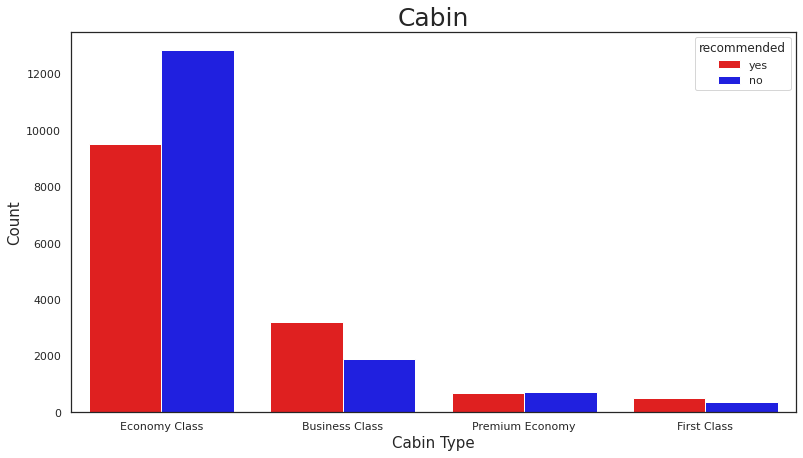

In [27]:
# Most recommended cabin.
plt.figure(figsize=(13,7))
sns.set_theme(style="white")

sns.countplot(airline_df['cabin'],hue=airline_df['recommended'],palette=['red','blue'])
plt.title('Cabin',fontsize = 25)
plt.xlabel('Cabin Type',fontsize = 15)
plt.ylabel('Count',fontsize = 15)
plt.show()

# So, economy class has the most recommendation whereas first class has the least recommendation.

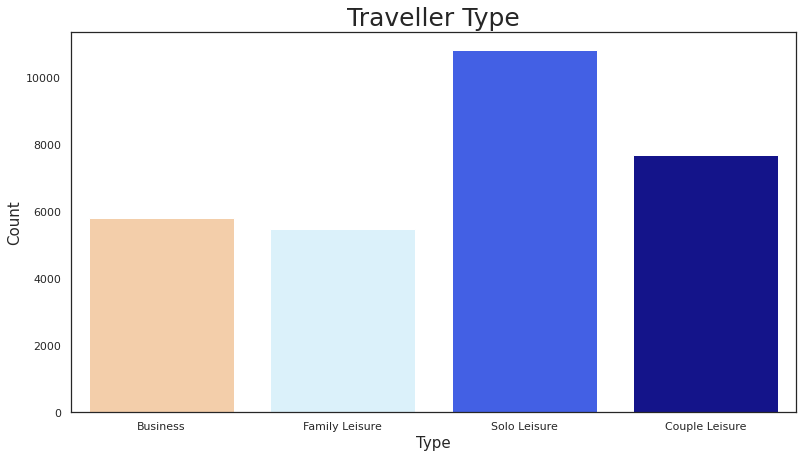

In [92]:
# Traveller type with most ratings.
plt.figure(figsize = (13,7))
sns.set_theme(style="white")
sns.countplot(airline_df['traveller_type'],palette="flag")
plt.title('Traveller Type',fontsize = 25)
plt.xlabel('Type',fontsize = 15)
plt.ylabel('Count',fontsize = 15)
plt.show()

# Its clear from the countplot that 'Solo Leisure' has highest ratings among all whereas 'Family Leisure' has the least ratings.

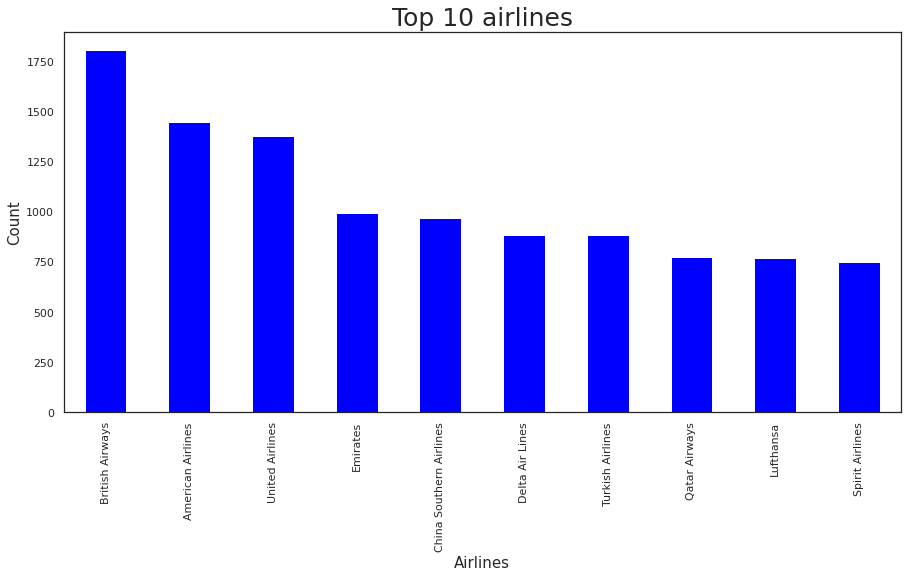

In [29]:
air=airline_df['airline'].value_counts()
# Visualisation of top 10 airlines in the dataset.
sns.set_theme(style="white")
plt.figure(figsize=(15,7))
air[:10].plot(kind='bar',color ='#0000FF')
plt.title('Top 10 airlines',fontsize=25)
plt.xlabel('Airlines',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

# 'Sprint airlines' has the maximum number of trips and this can be attributed to its ultra low cost fare compared to other airlines.

In [30]:
# Count of target variable (recommended).
airline_df['recommended'].value_counts()

# It is a binary classification problem.

no     15817
yes    13914
Name: recommended, dtype: int64

In [31]:
import plotly.express as px

px.histogram(airline_df, x="recommended",color="recommended",template="simple_white",width=700,height=500)

In [32]:
# Mapping the target feature with numerical data.
airline_df['recommended']=airline_df['recommended'].map({'yes':1,'no':0})


In [33]:
airline_df.drop(columns='index',inplace=True)

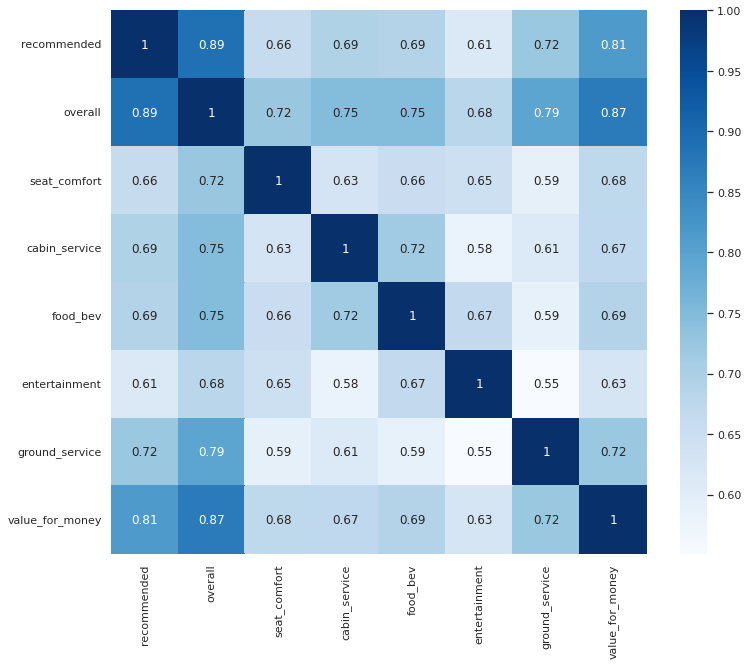

In [101]:
# Correlation.
plt.figure(figsize=(12,10))
sns.heatmap(airline_df.corr(), annot=True, cmap='Blues')
plt.show()


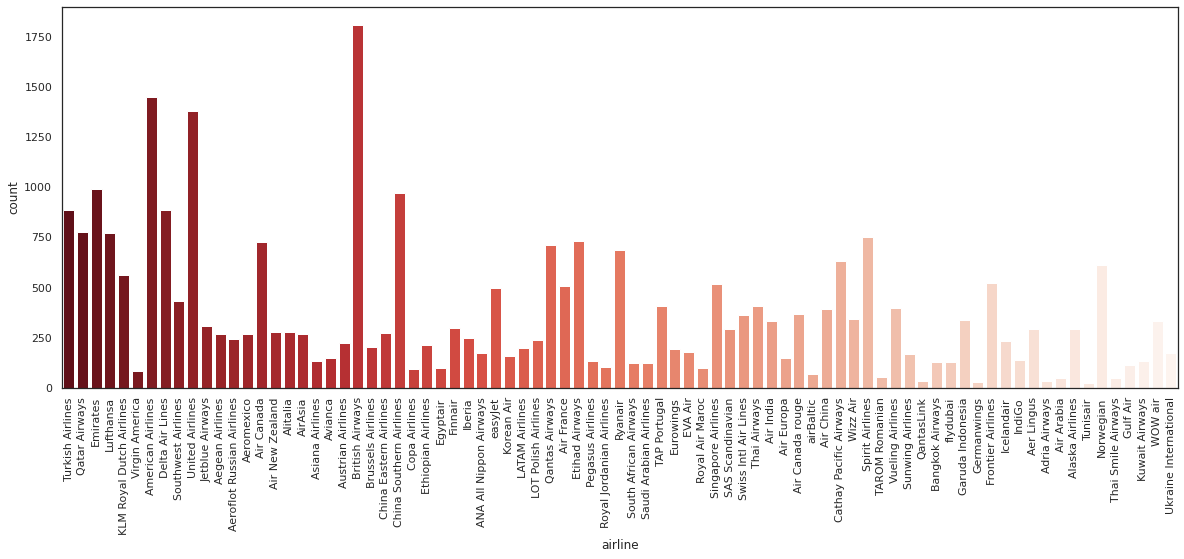

In [100]:
sns.set(rc={'figure.figsize':(20,7)})
sns.set_theme(style="white")
category_count=sns.countplot(x="airline",data=airline_df,palette="Reds_r")
category_count.set_xticklabels(category_count.get_xticklabels(), rotation=90)
sns.set_style("whitegrid")

In [97]:
features=airline_df.columns

In [40]:
features

Index(['airline', 'traveller_type', 'cabin', 'recommended', 'overall',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money'],
      dtype='object')

In [43]:
features_1= features.drop(['airline','recommended'])

traveller_type


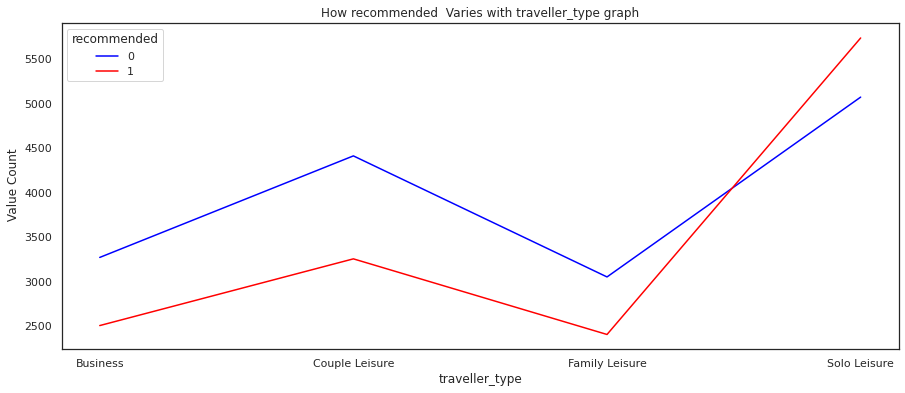

cabin


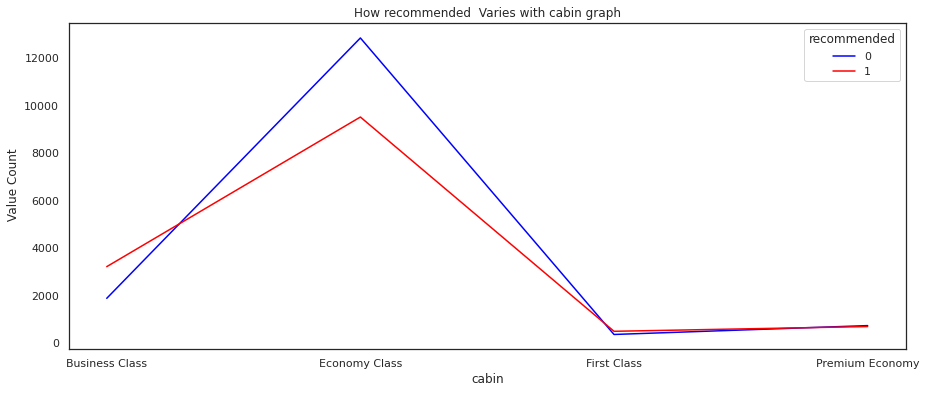

overall


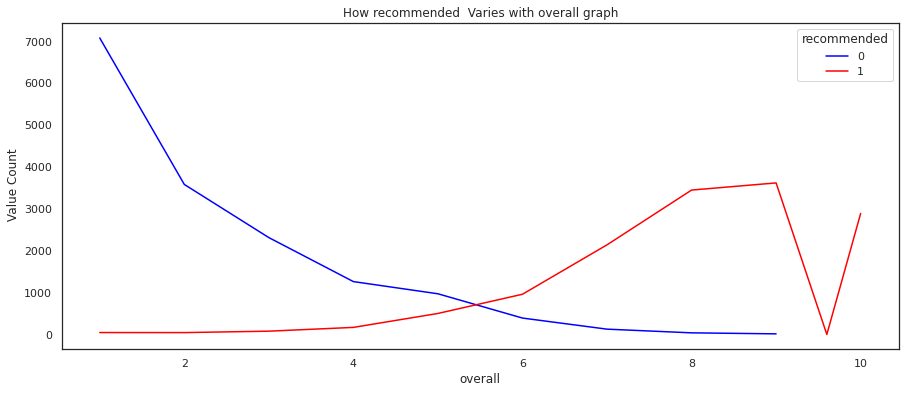

seat_comfort


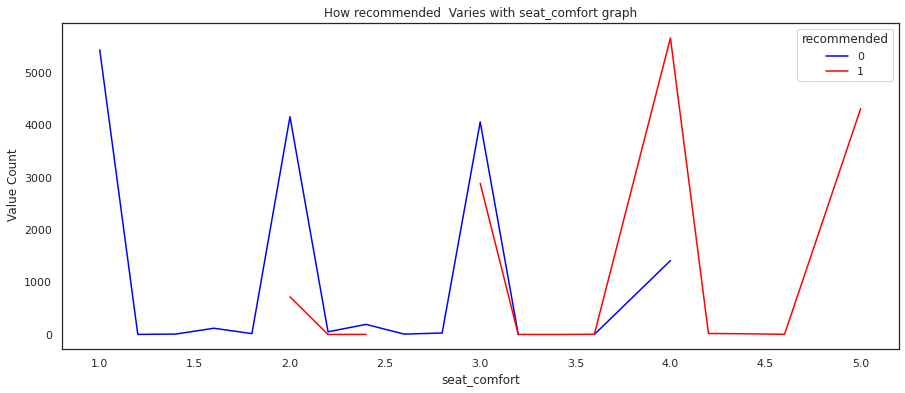

cabin_service


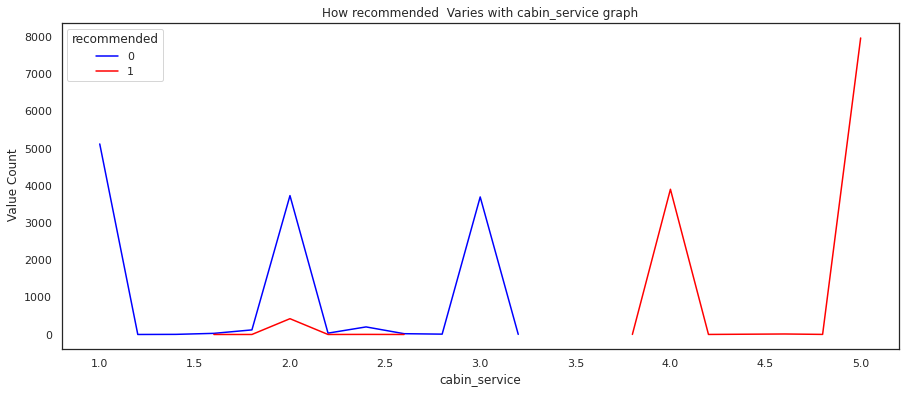

food_bev


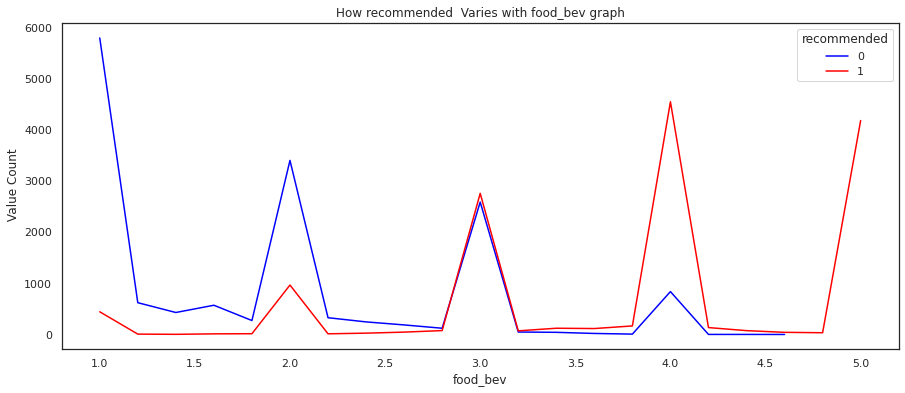

entertainment


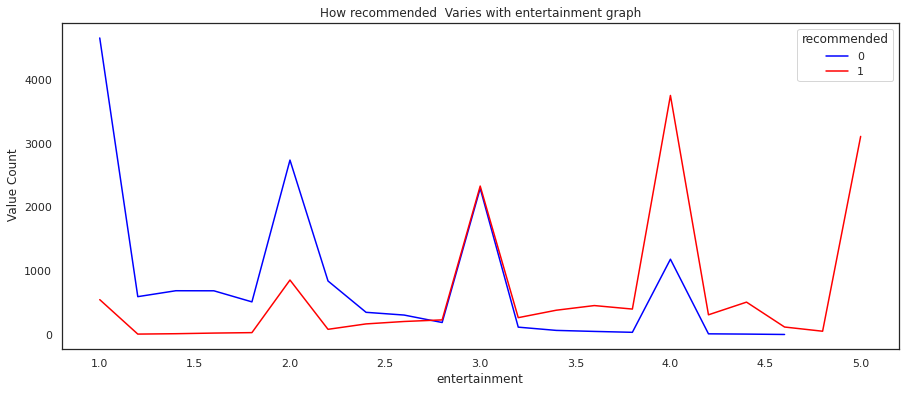

ground_service


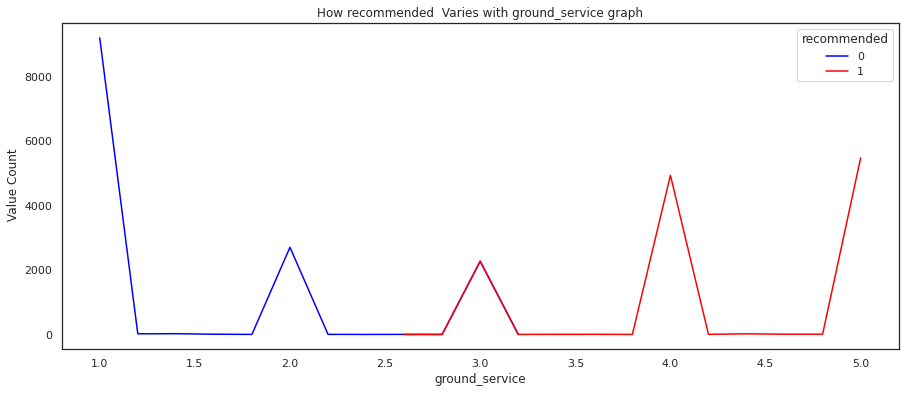

value_for_money


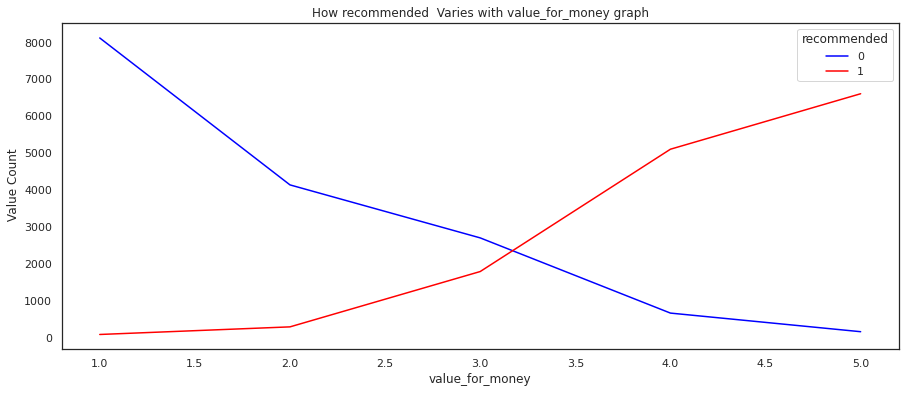

In [61]:
for feature in features_1:
  print(feature)
  sns.set_theme(style="white")
  airline_df.groupby([feature])['recommended'].value_counts().unstack().plot(kind='line',figsize=(15,6),color=['blue','red'])
  plt.title(f'How recommended  Varies with {feature} graph')
  plt.ylabel(' Value Count')
  plt.xlabel(feature)
  plt.show()